In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import missingno as msno
import random

In [7]:
df = pd.read_csv('global_shark_attacks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6587 non-null   object 
 1   year       6758 non-null   float64
 2   type       6871 non-null   object 
 3   country    6839 non-null   object 
 4   area       6409 non-null   object 
 5   location   6325 non-null   object 
 6   activity   6304 non-null   object 
 7   name       6670 non-null   object 
 8   sex        6318 non-null   object 
 9   age        3903 non-null   object 
 10  fatal_y_n  6890 non-null   object 
 11  time       3372 non-null   object 
 12  species    3772 non-null   object 
dtypes: float64(1), object(12)
memory usage: 699.9+ KB


In [27]:
df.head()

,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,time,species
0,2023-05-13,2023.0,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,Y,10h10,White shark
1,2023-04-29,2023.0,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,NaN,N,11h20,1m shark
2,2022-10-07,2022.0,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,N,11h30,Bull shark
3,2021-10-04,2021.0,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,N,NaN,NaN
4,2021-10-03,2021.0,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,NaN,N,12h00,NaN


In [28]:
df.tail()

,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,time,species
6885,NaN,NaN,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Y,NaN,NaN
6886,NaN,NaN,Unprovoked,INDONESIA,Riau Province,"Natuna Islands, between Sumatra & Kalimantan i...",Swimming near anchored ship,a ship's engineer,M,NaN,Y,NaN,NaN
6887,NaN,NaN,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,Y,Afternoon,Bull shark
6888,NaN,NaN,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Crew swimming alongside their anchored ship,male,M,NaN,Y,NaN,NaN
6889,NaN,NaN,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,Y,NaN,NaN


In [14]:
df.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'fatal_y_n', 'time', 'species'],
      dtype='object')

In [17]:
df.columns.to_list()

['date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'fatal_y_n',
 'time',
 'species']

In [22]:
df['sex']

0       M
1       M
2       M
3       M
4       M
       ..
6885    M
6886    M
6887    M
6888    M
6889    M
Name: sex, Length: 6890, dtype: object

In [24]:
df['location'].value_counts()

location
New Smyrna Beach, Volusia County                                       192
Daytona Beach, Volusia County                                           34
Ponce Inlet, Volusia County                                             26
Myrtle Beach, Horry County                                              21
Melbourne Beach, Brevard County                                         21
                                                                      ... 
St. Thomé                                                                1
Uo, Lahaina, Maui                                                        1
On the Thames River                                                      1
Natuna Islands, between Sumatra & Kalimantan in the South China Sea      1
Melaleuca Beach, Cowaramup Bay, Gracetown,                               1
Name: count, Length: 4427, dtype: int64

In [127]:
df['sex'].value_counts()

sex
M      1730
F       278
lli       1
Name: count, dtype: int64

In [128]:
#statsitik tahlil qilish

df.describe()

,date,year,age,time
count,0,2009.000000,2009.000000,2009
mean,NaT,1993.164261,28.285714,1970-01-01 00:00:00.000001215
min,NaT,1852.000000,4.000000,1970-01-01 00:00:00.000000830
25%,NaT,1980.000000,20.000000,1970-01-01 00:00:00.000001215
50%,NaT,2003.000000,24.000000,1970-01-01 00:00:00.000001215
75%,NaT,2012.000000,34.000000,1970-01-01 00:00:00.000001215
max,NaT,2023.000000,84.000000,1970-01-01 00:00:00.000001600
std,NaN,26.321694,13.307466,NaN


In [129]:
# tushib qolgan qiymatlarni aniqlash

df.isnull().sum()

date         2009
year            0
type            0
country         0
area            0
location        0
activity        0
name            0
sex             0
age             0
fatal_y_n       0
time            0
species         0
dtype: int64

<Axes: xlabel='location', ylabel='species'>

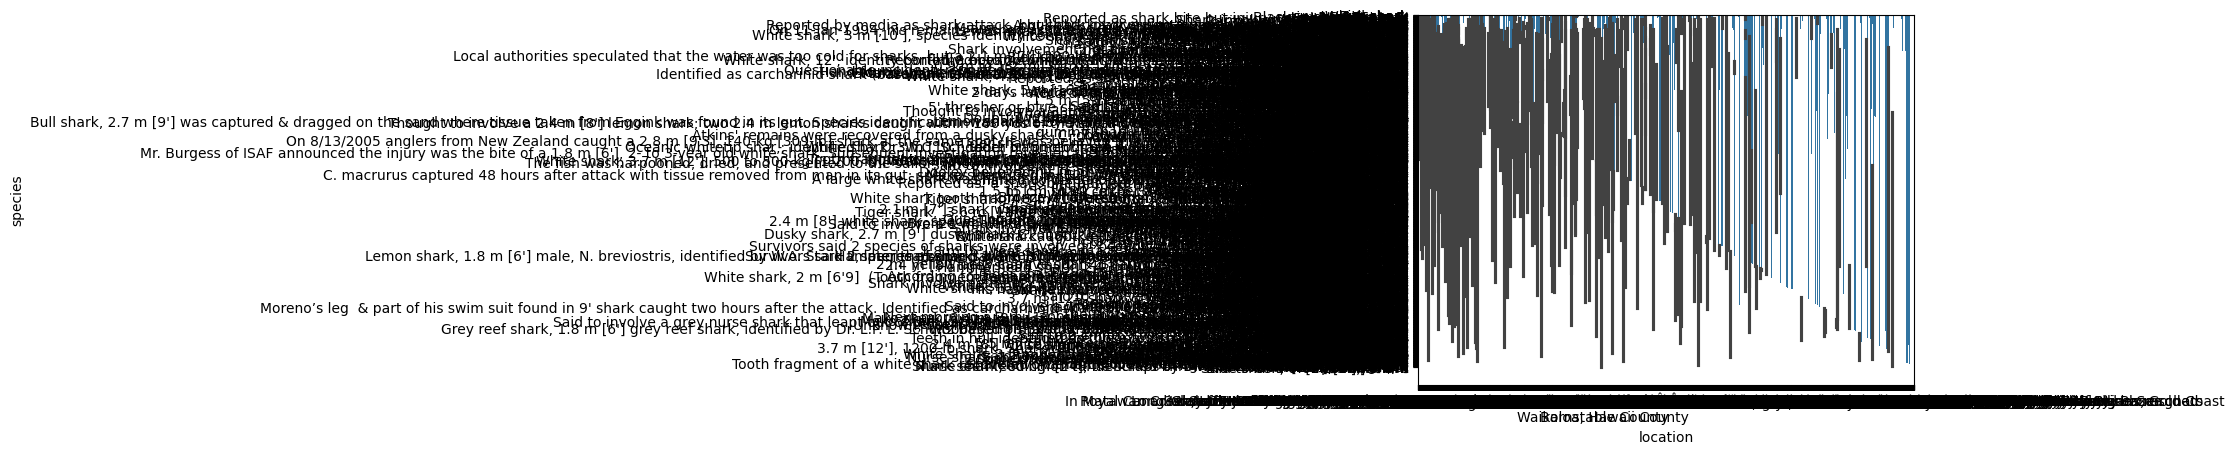

In [31]:
sns.barplot(data=df,x='location',y='species')

<Axes: xlabel='sex', ylabel='Count'>

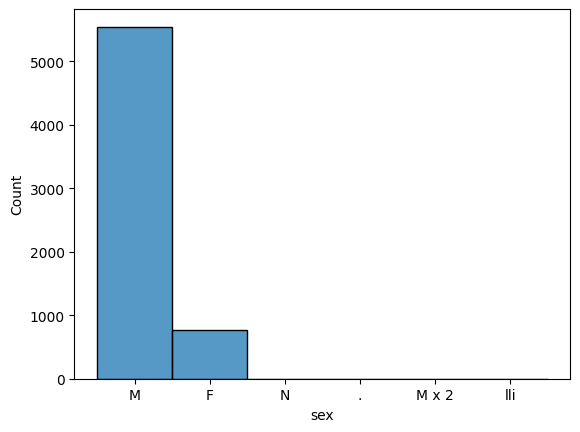

In [35]:
sns.histplot(data = df, x='sex')

<Axes: xlabel='species', ylabel='Count'>

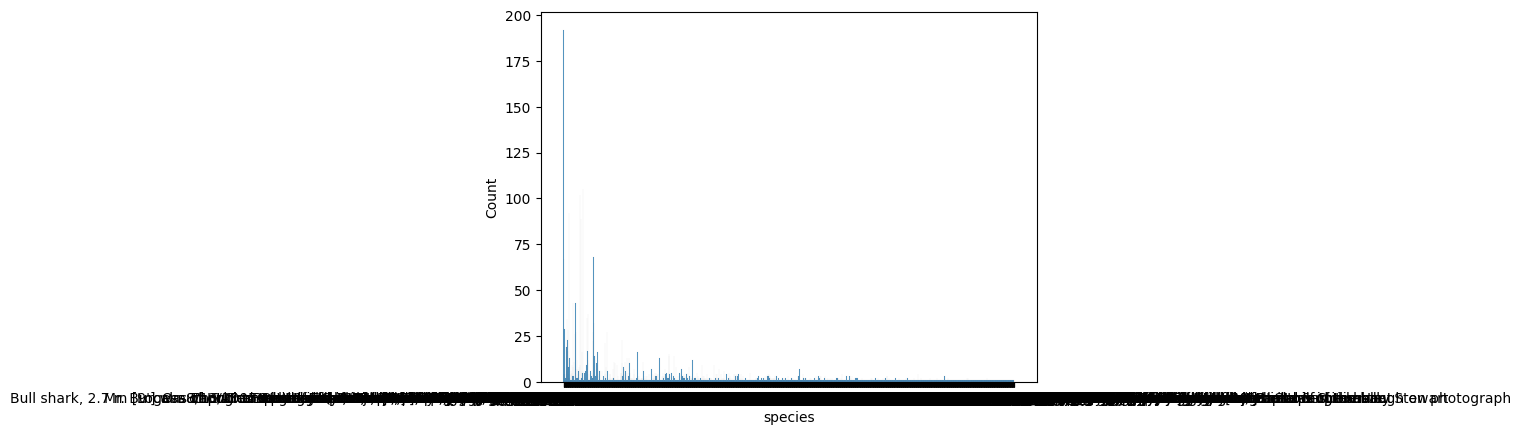

In [33]:
sns.histplot(data = df, x='species')

In [34]:
df['species'].value_counts()

species
White shark                                                                                          192
Shark involvement prior to death was not confirmed                                                   105
Invalid                                                                                              102
Shark involvement not confirmed                                                                       92
Tiger shark                                                                                           89
                                                                                                    ... 
3 m [10'] gaffed shark                                                                                 1
Raggedtooth shark, 2 m                                                                                 1
Tooth fragment of a white shark recovered. Authorities believed shark was 6 m [20']  total length      1
Shark involvement not confirmed; officials cons

In [130]:
df['sex']

0       M
1       M
2       M
6       M
10      M
       ..
6817    M
6818    M
6824    M
6843    M
6844    M
Name: sex, Length: 2009, dtype: object

In [131]:
df['sex'].fillna("M", inplace=True)

In [132]:
# turini, miqdorini tekshirish

df['sex'].value_counts()

sex
M      1730
F       278
lli       1
Name: count, dtype: int64

In [133]:
# muayyan column (bu yerda species) ga access olish va ustida amallar bajarish
# buyerda bu kodining o'zi esa shunchaki value larni ko'rsatyapti xolos.

df['species']

0                                             White shark
1                                                1m shark
2                                              Bull shark
6                                            5.5 ft shark
10                               Blacktip shark, 6' to 7'
                              ...                        
6817                                             6' shark
6818    Shark seen feeding on turtle scraps thrown ove...
6824                                      Wobbegong shark
6843                       Blue shark, 8' [2.4 m], 500-lb
6844                                          White shark
Name: species, Length: 2009, dtype: object

In [134]:
# turini tekshirish
# Masalan buyerda White shark 105 ta Tiger shark 89 ta

df['species'].value_counts()

species
White shark                                                                119
Tiger shark                                                                 49
4' shark                                                                    38
Bull shark                                                                  36
Shark involvement not confirmed                                             36
                                                                          ... 
Tiger shark, 4.3 m [14']                                                     1
Shark involvement not confirmed; officials considered barracua               1
White shark, 2.1 m [7']                                                      1
Shark seen feeding on turtle scraps thrown overboard prior to incident.      1
2.5' shark                                                                   1
Name: count, Length: 983, dtype: int64

In [135]:
# Missing value larni tekshirish

df.isnull().sum()

date         2009
year            0
type            0
country         0
area            0
location        0
activity        0
name            0
sex             0
age             0
fatal_y_n       0
time            0
species         0
dtype: int64

In [136]:
# Missing value ni tekshirish (faqat bitta column)
# Buyereda species column tekshirilgan va 3118 ta missing value bor.

df['species'].isnull().sum()

np.int64(0)

In [137]:
# Checking the percentage of missing values to see how serious the issue is:

df.isnull().sum() / len(df) * 100

date         100.0
year           0.0
type           0.0
country        0.0
area           0.0
location       0.0
activity       0.0
name           0.0
sex            0.0
age            0.0
fatal_y_n      0.0
time           0.0
species        0.0
dtype: float64

In [138]:
df['age']

0       46.0
1       24.0
2       38.0
6       14.0
10      17.0
        ... 
6817    14.0
6818    22.0
6824     8.0
6843    24.0
6844    14.0
Name: age, Length: 2009, dtype: float64

In [139]:
df.isnull().sum()

date         2009
year            0
type            0
country         0
area            0
location        0
activity        0
name            0
sex             0
age             0
fatal_y_n       0
time            0
species         0
dtype: int64

In [140]:
df['age'].value_counts()

age
24.0    430
19.0     71
17.0     65
18.0     63
20.0     60
       ... 
4.0       2
5.0       1
84.0      1
75.0      1
67.0      1
Name: count, Length: 73, dtype: int64

In [141]:
# Fill with median

# df['age'].fillna(df['age'].median(), inplace=True)


In [142]:
# shu ustundagi missing valuelar miqdorini tekshirish

df['time'].isnull().sum()

np.int64(0)

In [143]:
# unique values in the column

df['age'].unique()


array([46., 24., 38., 14., 17., 60., 57., 33., 13., 12., 31.,  9., 25.,
       32., 47., 28., 20., 45., 68.,  8., 23., 34., 19., 18., 27., 49.,
       21., 26., 52., 35., 43.,  6., 29., 48., 22., 15., 36., 51., 16.,
       54., 70., 74., 58., 40., 71., 63., 62., 61.,  7., 37., 39., 42.,
       41., 30., 55., 10., 56., 11., 53., 50., 73., 44., 69., 59., 66.,
        5., 64., 65., 77., 84., 75.,  4., 67.])

In [144]:
# age ustunidagi raqamli bo'lmagan datalarni raqamliga o'zgartirish
# errors = coerce degani ikkita raqam berilgan bo'lsa uni berilmaganga almashtirish
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df['date'] = pd.to_numeric(df['date'], errors='coerce')

In [145]:
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_736\2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [146]:
df['age'].isnull().sum()

np.int64(0)

In [147]:
df.isnull().sum()

date         0
year         0
type         0
country      0
area         0
location     0
activity     0
name         0
sex          0
age          0
fatal_y_n    0
time         0
species      0
dtype: int64

In [148]:
# Fix method, using a specific value to fill missing value

# df['name'].fillna('John', inplace=True)


In [149]:
names = ['John', 'Alice', 'Micheal']

In [150]:
df['name'] = df['name'].fillna(df['name'].apply(lambda x: random.choice(names) if pd.isna(x) else x ))

In [151]:
df['name'].value_counts()

name
male                     105
female                    29
Andre Hartman              3
Alice                      3
Micheal                    3
                        ... 
George Lucas               1
Aaron  A. Romento          1
Rick (Eric) Gruzinsky      1
Rodney Swan                1
Melony Klein               1
Name: count, Length: 1863, dtype: int64

In [152]:
df['name'].fillna('John', inplace=True)


C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_736\1886302966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('John', inplace=True)


In [153]:
df.isnull().sum()

date         0
year         0
type         0
country      0
area         0
location     0
activity     0
name         0
sex          0
age          0
fatal_y_n    0
time         0
species      0
dtype: int64

In [154]:
# column dagi missing value larni tashlab yuborish

df=df.dropna(subset=['type'])


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 6844
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2009 non-null   int64  
 1   year       2009 non-null   float64
 2   type       2009 non-null   object 
 3   country    2009 non-null   object 
 4   area       2009 non-null   object 
 5   location   2009 non-null   object 
 6   activity   2009 non-null   object 
 7   name       2009 non-null   object 
 8   sex        2009 non-null   object 
 9   age        2009 non-null   float64
 10  fatal_y_n  2009 non-null   object 
 11  time       2009 non-null   int64  
 12  species    2009 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 219.7+ KB


In [156]:
df.isnull().sum()

date         0
year         0
type         0
country      0
area         0
location     0
activity     0
name         0
sex          0
age          0
fatal_y_n    0
time         0
species      0
dtype: int64

In [157]:
df.count()

date         2009
year         2009
type         2009
country      2009
area         2009
location     2009
activity     2009
name         2009
sex          2009
age          2009
fatal_y_n    2009
time         2009
species      2009
dtype: int64

In [158]:
df.shape[0]

2009

In [ ]:
#tushib qolganlarni bir joyga jamlash

# tushib_qolganlar=df.columns[df.isnull().any()]
#tushib_qolganlar

Index(['date', 'year', 'country', 'area', 'location', 'activity', 'time',
       'species'],
      dtype='object')

In [159]:
#tushib qolganlarni umumiy tashlab yuborish

# df=df.dropna(subset=tushib_qolganlar)

In [160]:
df.isnull().sum()

date         0
year         0
type         0
country      0
area         0
location     0
activity     0
name         0
sex          0
age          0
fatal_y_n    0
time         0
species      0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 6844
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2009 non-null   int64  
 1   year       2009 non-null   float64
 2   type       2009 non-null   object 
 3   country    2009 non-null   object 
 4   area       2009 non-null   object 
 5   location   2009 non-null   object 
 6   activity   2009 non-null   object 
 7   name       2009 non-null   object 
 8   sex        2009 non-null   object 
 9   age        2009 non-null   float64
 10  fatal_y_n  2009 non-null   object 
 11  time       2009 non-null   int64  
 12  species    2009 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 219.7+ KB


In [162]:
df.count()

date         2009
year         2009
type         2009
country      2009
area         2009
location     2009
activity     2009
name         2009
sex          2009
age          2009
fatal_y_n    2009
time         2009
species      2009
dtype: int64

Drop

In [163]:
#df=df.dropna(subset=['type'])
#df=df.dropna(subset=['age'])

In [164]:
# drop da bir qatorni yoki hamma qatorni tashlab yuborish mumkin
# birinchisi bir qatorni tashlash

#df=df.dropna(subset=['age'])
#df=df.dropna(subset=['age'])
#df=df.dropna(subset=['species'])

#ikkinchisi umumiy

#missing_values = df.columns[df.isnull().any()]
#missing_values=df.columns[df.isnull().any()]
#df=df.dropna(subset=missing_values)
#missing_values=df.columns[df.isnull().any()]
#df=df.dropna(subset=missing_values)

Fix

In [165]:
# ustunni qat'iy qiymat bilan to'ldirish

#df['species'].fillna('White shark', inplace=True)
#df['sex'].fillna('female', inplace=True)
#df['age'].fillna(20, inplace=True)

Mean

In [166]:
# mean odatda raqamlar bilan ishlaydi va raqmli dataning o'rta hisboni olib value yo'q joylarni to'lidiradi

df['age'].fillna(df['age'].mean(), inplace=True)
df['date'].fillna(df['date'].mean(), inplace=True)
df['time'].fillna(df['time'].mean(), inplace=True)


# kodlar raqamli emas string yoki object typeda bo'lgani uchun ishlamadi va ularni quyidagi kodlar orqali raqamli formatga aylantirildi

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['time'] = pd.to_datetime(df['time'], errors= "coerce")
df['date']=pd.to_datetime(df['date'], errors='coerce')


C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_736\3561826525.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_736\3561826525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Mode

In [169]:
df['name'].fillna(df['name'].mode()[0], inplace=True)
df['species'].fillna(df['species'].mode()[0], inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)

C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_736\4124772030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna(df['name'].mode()[0], inplace=True)
C:\Users\Saidabrorkhon\AppData\Local\Temp\ipykernel_736\4124772030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 6844
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       0 non-null      datetime64[ns]
 1   year       2009 non-null   float64       
 2   type       2009 non-null   object        
 3   country    2009 non-null   object        
 4   area       2009 non-null   object        
 5   location   2009 non-null   object        
 6   activity   2009 non-null   object        
 7   name       2009 non-null   object        
 8   sex        2009 non-null   object        
 9   age        2009 non-null   float64       
 10  fatal_y_n  2009 non-null   object        
 11  time       2009 non-null   datetime64[ns]
 12  species    2009 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 219.7+ KB


Median

In [ ]:
# median o'rta postiondagi value qiymatini topadi va missing valuelarni o'sha bilan to'ldiradi.

df['age'].fillna(df['age'].median(), inplace= True)
df['salary'].fillna(df['salary'].median(), inplace=True)